# Explore here

It's recommended to use this notebook for exploration purposes.

/tmp/ipykernel_496/2756414271.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  leucocito_table = leucocito_table.append({"Tipo": tipo, "Porcentaje aproximado en adultos": porcentaje}, ignore_index=True)
/tmp/ipykernel_496/2756414271.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  leucocito_table = leucocito_table.append({"Tipo": tipo, "Porcentaje aproximado en adultos": porcentaje}, ignore_index=True)
/tmp/ipykernel_496/2756414271.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  leucocito_table = leucocito_table.append({"Tipo": tipo, "Porcentaje aproximado en adultos": porcentaje}, ignore_index=True)
/tmp/ipykernel_496/2756414271.py:39: FutureWarning: The frame.append method is deprecated and will be removed fr

         Tipo Porcentaje aproximado en adultos
0  Neutrófilo                              62%
1  Eosinófilo                             2.3%
2    Basófilo                             0.4%
3   Linfocito                              30%
4    Monocito                             5.3%
Tipo: Neutrófilo, Porcentaje aproximado en adultos: 62%
Tipo: Eosinófilo, Porcentaje aproximado en adultos: 2.3%
Tipo: Basófilo, Porcentaje aproximado en adultos: 0.4%
Tipo: Linfocito, Porcentaje aproximado en adultos: 30%
Tipo: Monocito, Porcentaje aproximado en adultos: 5.3%


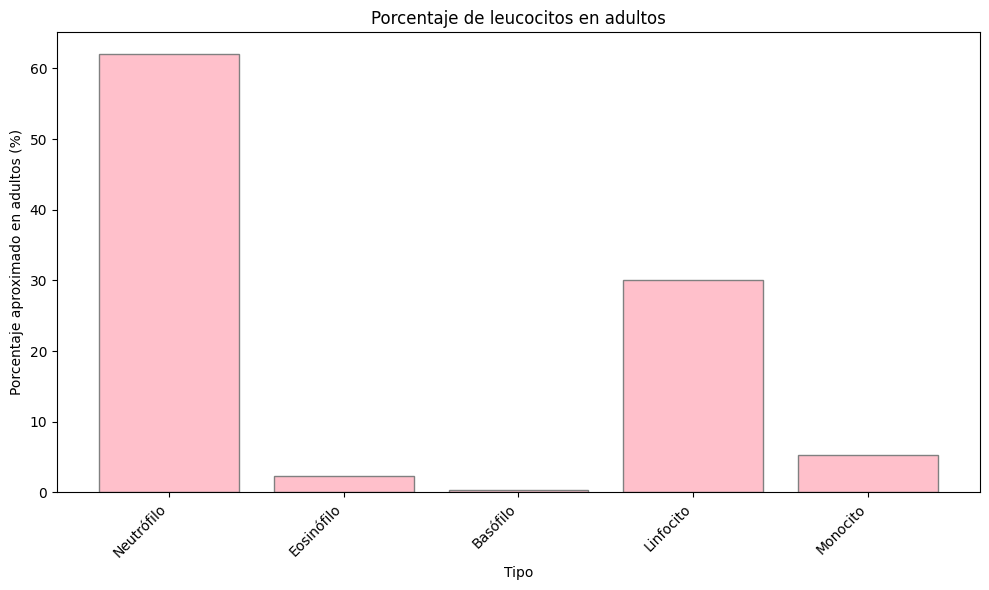

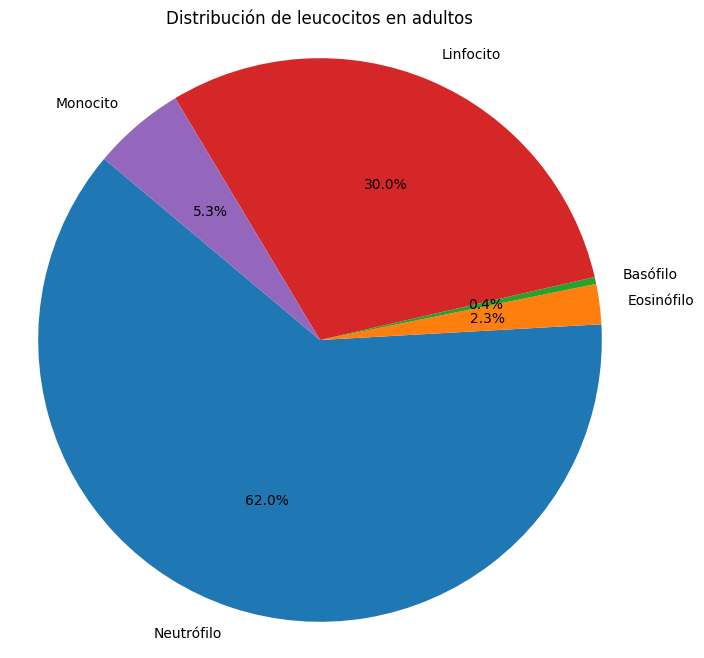

In [1]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# elijo la url de descarga, y 
resource_url = "https://es.wikipedia.org/wiki/Leucocito"

# hago la soli para descargar el contenido de la pag 
response = requests.get(resource_url, time.sleep(10))
response
if response:   # si hay respuesta, si no hay error? 
    soup = BeautifulSoup(response.text, 'html')
    #soup

# Buscar todas las tablas# table class="wikitable"
selected_table = soup.find('table', class_='wikitable') 
#lo puse asi porque es la tabla que he eligido, no es tablas porque directamente voy la wikitable


#creo dataframe vacio con las columnas que quiero, que son las que tienen datos que se pueden comparar o analizar de alguna manera (el resto es puro texto)

leucocito_table = pd.DataFrame(columns=["Tipo", "Porcentaje aproximado en adultos"])


#ahora, 
if selected_table:
    for row in selected_table.find_all('tr'):   #cada fila dentro de html se marca com tr
        celdas = row.find_all("td")            # son las celdas, td  . busco todas las celdas dentro de cada fila
        if len(celdas) >= 4:
            tipo = celdas[0].text.strip()       #almaceno el texto de la primera celda en esta vr
            porcentaje = celdas[3].text.strip()
            if "%" in porcentaje:  # bueno con la condicion de % si me encuentra los datos
                    leucocito_table = leucocito_table.append({"Tipo": tipo, "Porcentaje aproximado en adultos": porcentaje}, ignore_index=True)
else:
     print("no se que onda")
print(leucocito_table)




teste = sqlite3.connect("leucocito.db")
#teste.execute("""CREATE TABLE leucocitos (
    #Porcentaje aproximado en adultos           TEXT    NOT NULL)""")
#teste.execute("""INSERT INTO leucocitos VALUES ('Neutrófilo', '62%')""")
#teste.execute("""INSERT INTO leucocitos VALUES ('Eosinófilo', '2.3%')""")
#teste.execute("""INSERT INTO leucocitos VALUES ('Basófilo', '0.4%')""")
#teste.execute("""INSERT INTO leucocitos VALUES ('Linfocito', '30%')""")
#teste.execute("""INSERT INTO leucocitos VALUES ('Monocito', '5.3%')""")
#teste.commit()


cursor = teste.cursor()
cursor.execute("SELECT * FROM leucocitos")

for row in cursor:
    print(f"Tipo: {row[0]}, Porcentaje aproximado en adultos: {row[1]}")


leucocito_table["Porcentaje aproximado en adultos"] = leucocito_table["Porcentaje aproximado en adultos"].str.replace('%', '').astype(float)

plt.figure(figsize=(10, 6))
plt.bar(leucocito_table["Tipo"], leucocito_table["Porcentaje aproximado en adultos"], color='pink', edgecolor='grey')
plt.xlabel('Tipo')
plt.ylabel('Porcentaje aproximado en adultos (%)')
plt.title('Porcentaje de leucocitos en adultos')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 8))
plt.pie(leucocito_table["Porcentaje aproximado en adultos"], labels=leucocito_table["Tipo"], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.title('Distribución de leucocitos en adultos')
plt.show()